## Idriss Khattabi - IA&SD - TP K-Means

### the meanings of each column in your dataset about weather:

1. **year**: The year in which the weather data was recorded.
2. **month**: The month in which the weather data was recorded.
3. **day**: The day of the month on which the weather data was recorded.
4. **hour**: The hour of the day at which the weather data was recorded.
5. **PM2.5**: Particulate Matter (PM) with a diameter of 2.5 micrometers or smaller, which can penetrate deeply into the respiratory system and pose health risks when present in high concentrations.
6. **PM10**: Particulate Matter (PM) with a diameter of 10 micrometers or smaller, which can also have adverse health effects when present in high concentrations.
7. **SO2**: Sulfur dioxide, a gas primarily emitted from burning fossil fuels like coal and oil. It can contribute to respiratory problems and is a precursor to acid rain.
8. **NO2**: Nitrogen dioxide, a reddish-brown gas that forms when nitrogen oxides react with pollutants in the air. It can irritate airways and worsen respiratory conditions.
9. **CO**: Carbon monoxide, a colorless, odorless gas produced by incomplete combustion of carbon-containing fuels. It can be harmful when inhaled in large amounts, leading to carbon monoxide poisoning.
10. **O3**: Ozone, a gas composed of three oxygen atoms. While ozone high in the atmosphere protects us from the sun's ultraviolet rays, ground-level ozone is a pollutant that can cause respiratory problems and exacerbate lung conditions.
11. **TEMP**: Temperature, the measure of the warmth or coldness of the air.
12. **PRES**: Atmospheric pressure, the force exerted by the weight of air molecules above a particular point on the Earth's surface.
13. **DEWP**: Dew point, the temperature at which air becomes saturated with water vapor and dew begins to form.
14. **RAIN**: Precipitation, the amount of rainfall recorded during the specified time period.
15. **WSPM**: Wind speed, the rate at which air is moving horizontally past a given point.
16. **wd**: Wind direction, indicating the direction from which the wind is blowing. It is usually reported in cardinal directions (e.g., N for North, S for South, etc.) or degrees (e.g., 0° for North, 90° for East, etc.).
17. **station**: The name or identifier of the weather station where the data was recorded. This column specifies the location or source of the weather observations.

These columns provide various measurements and indicators of weather conditions, air quality, and atmospheric properties.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

## Import Data and Explor it:

In [2]:
# import des données
data = pd.read_csv("DataMeteo12 Complet.csv")
data.head(5)

No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    5.0  14.0  4.0  12.0  200.0  85.0  -0.5   
1   2  2013      3    1     1    8.0  12.0  6.0  14.0  200.0  84.0  -0.7   
2   3  2013      3    1     2    3.0   6.0  5.0  14.0  200.0  83.0  -1.2   
3   4  2013      3    1     3    5.0   5.0  5.0  14.0  200.0  84.0  -1.4   
4   5  2013      3    1     4    5.0   5.0  6.0  21.0  200.0  77.0  -1.9   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1024.5 -21.4   0.0  NNW   5.7  Nongzhanguan  
1  1025.1 -22.1   0.0   NW   3.9  Nongzhanguan  
2  1025.3 -24.6   0.0  NNW   5.3  Nongzhanguan  
3  1026.2 -25.5   0.0    N   4.9  Nongzhanguan  
4  1027.1 -24.5   0.0  NNW   3.2  Nongzhanguan

In [3]:
data.describe().T

count          mean           std        min      25%      50%  \
No     35064.0  17532.500000  10122.249256     1.0000  8766.75  17532.5   
year   35064.0   2014.662560      1.177213  2013.0000  2014.00   2015.0   
month  35064.0      6.522930      3.448752     1.0000     4.00      7.0   
day    35064.0     15.729637      8.800218     1.0000     8.00     16.0   
hour   35064.0     11.500000      6.922285     0.0000     5.75     11.5   
PM2.5  34436.0     84.838483     86.225344     2.0000    22.00     59.0   
PM10   34624.0    108.991096     95.341177     2.0000    38.00     85.0   
SO2    34618.0     18.689242     24.280665     0.5712     3.00      9.0   
NO2    34372.0     58.097172     36.297740     2.0000    29.00     51.0   
CO     33858.0   1324.350198   1245.166124   100.0000   500.00    900.0   
O3     34558.0     58.534682     58.401448     0.2142    10.00     45.0   
TEMP   35044.0     13.671490     11.458418   -16.8000     3.10     14.6   
PRES   35044.0   1012.547419     10.266059   987.1000  1004.00   1012.2   
DEWP   35044.0      2.447535     13.810696   -35.3000    -8.80      3.0   
RAIN   35044.0      0.064020      0.786282     0.0000     0.00      0.0   
WSPM   35050.0      1.860785      1.280368     0.0000     1.00      1.5   

            75%      max  
No     26298.25  35064.0  
year    2016.00   2017.0  
month     10.00     12.0  
day       23.00     31.0  
hour      17.25     23.0  
PM2.5    116.00    844.0  
PM10     149.00    995.0  
SO2       23.00    257.0  
NO2       80.00    273.0  
CO      1600.00  10000.0  
O3        84.00    390.0  
TEMP      23.50     41.1  
PRES    1020.90   1042.0  
DEWP      15.00     28.8  
RAIN       0.00     46.4  
WSPM       2.40     10.5

In [4]:
len(data)

35064

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34436 non-null  float64
 6   PM10     34624 non-null  float64
 7   SO2      34618 non-null  float64
 8   NO2      34372 non-null  float64
 9   CO       33858 non-null  float64
 10  O3       34558 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [6]:
data.columns

Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')

--------------------

## Pre-Processing :

<Axes: >

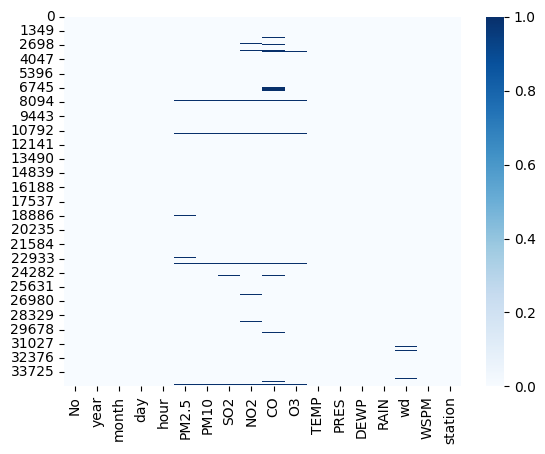

In [7]:
sns.heatmap(data.isnull(), cmap = 'Blues')

In [8]:
cols = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

for i in cols :
    data[i].fillna(data[i].mean(), inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    35064 non-null  float64
 6   PM10     35064 non-null  float64
 7   SO2      35064 non-null  float64
 8   NO2      35064 non-null  float64
 9   CO       35064 non-null  float64
 10  O3       35064 non-null  float64
 11  TEMP     35064 non-null  float64
 12  PRES     35064 non-null  float64
 13  DEWP     35064 non-null  float64
 14  RAIN     35064 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35064 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [10]:
cols_for_drop = ["No", "wd", "station"]
cleaned_data1 = data.drop(columns=cols_for_drop)

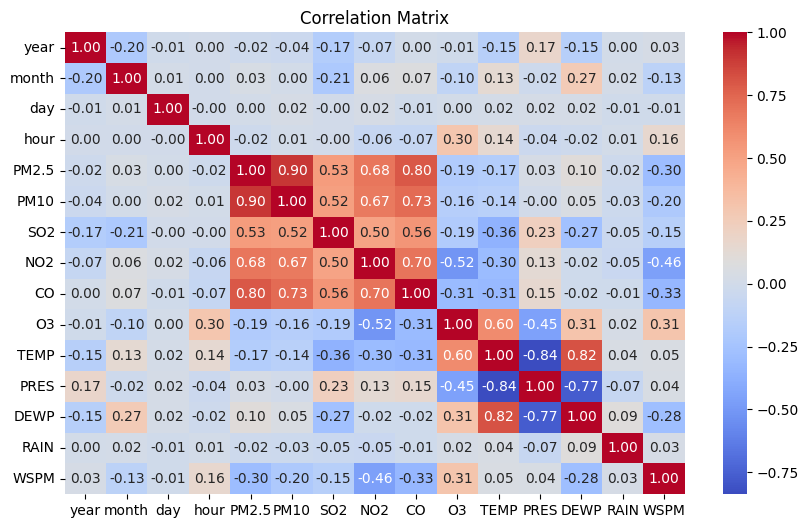

In [11]:
plt.figure(figsize=(10, 6))
correlation_matrix = pd.DataFrame(cleaned_data1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [12]:
data = data.drop_duplicates()

In [13]:
cols_for_drop = ["No","year", "month", "day", "hour", "wd", "station", "RAIN", "WSPM"]
cleaned_data1 = data.drop(columns=cols_for_drop)

In [14]:
cleaned_data1.columns

Index(['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP'], dtype='object')

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_cleaned_data = scaler.fit_transform(cleaned_data1)

scaled_cleaned_data = pd.DataFrame(scaled_cleaned_data)
scaled_cleaned_data.columns = cleaned_data1.columns

In [17]:
scaled_cleaned_data.head(5)

PM2.5      PM10      SO2       NO2        CO        O3      TEMP  \
0 -0.934347 -1.002653 -0.60887 -1.282713 -0.918927  0.456474 -1.237146   
1 -0.899238 -1.023764 -0.52597 -1.227060 -0.918927  0.439226 -1.254606   
2 -0.957753 -1.087095 -0.56742 -1.227060 -0.918927  0.421978 -1.298255   
3 -0.934347 -1.097650 -0.56742 -1.227060 -0.918927  0.439226 -1.315714   
4 -0.934347 -1.097650 -0.52597 -1.032276 -0.918927  0.318490 -1.359363   

       PRES      DEWP  
0  1.164630 -1.727261  
1  1.223093 -1.777962  
2  1.242580 -1.959035  
3  1.330274 -2.024221  
4  1.417968 -1.951792

--------------------

## Visualization :

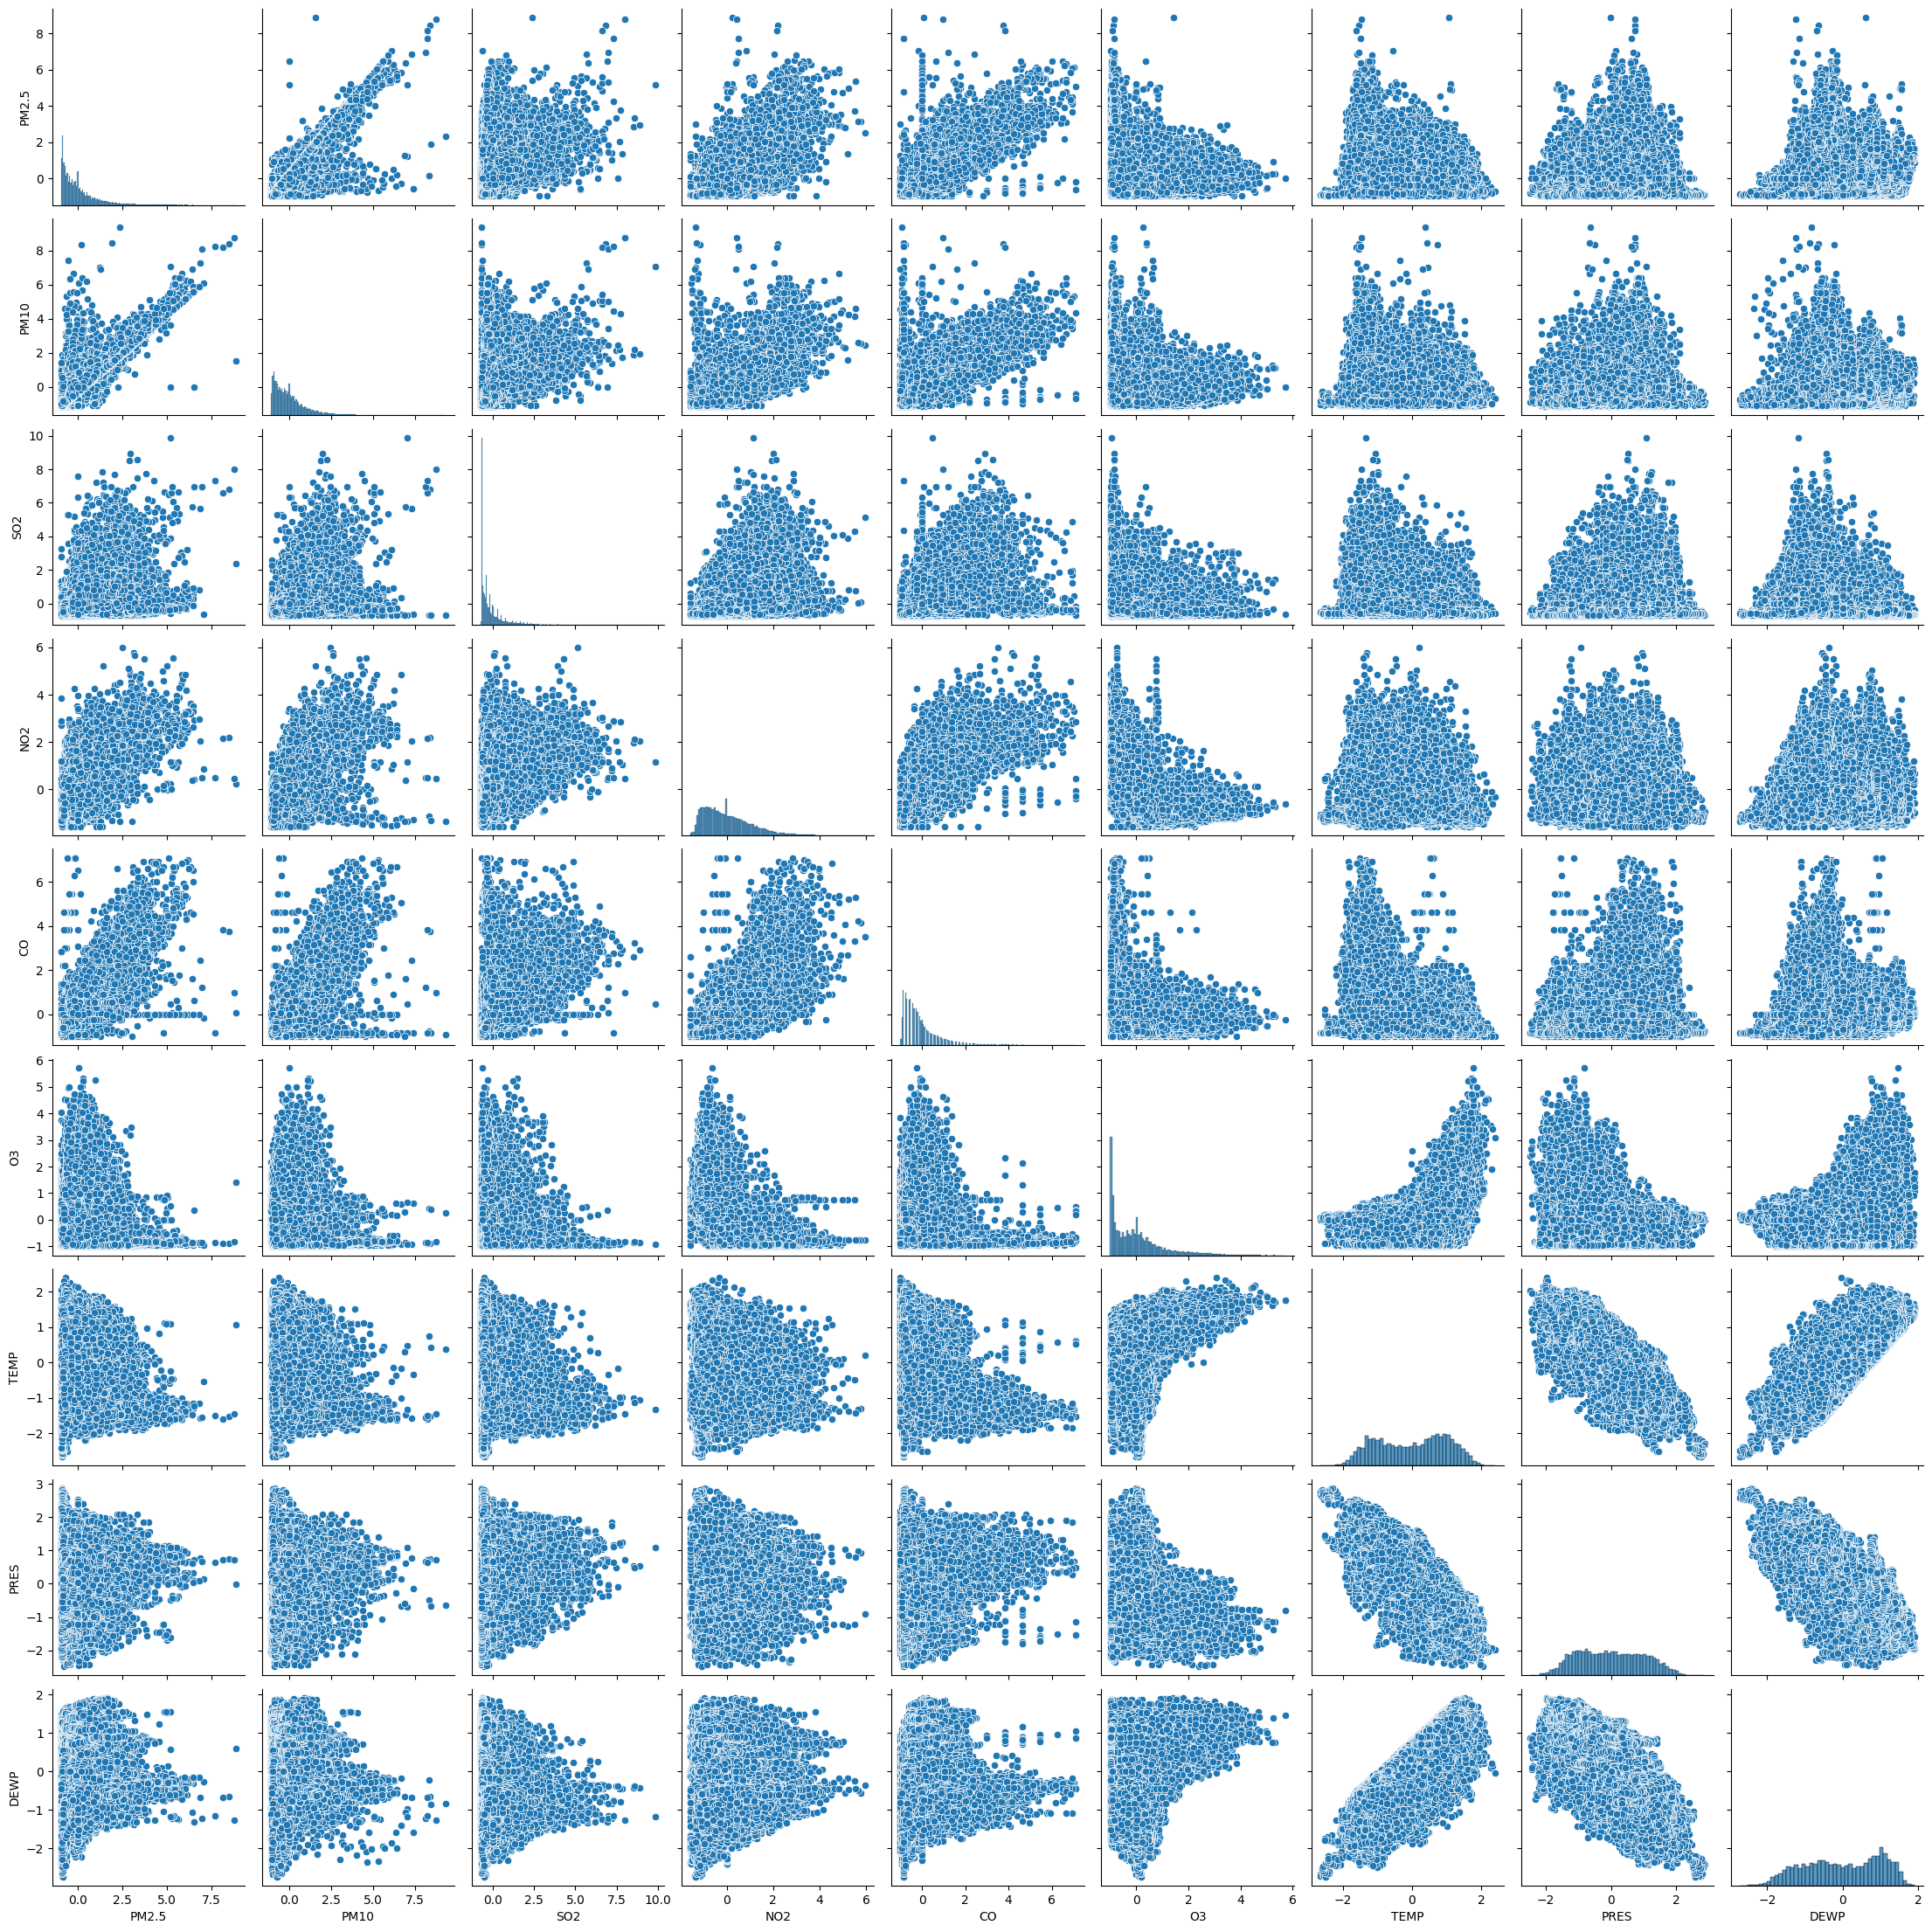

In [18]:
sns.pairplot(scaled_cleaned_data)

In [19]:
scaled_cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM2.5   35064 non-null  float64
 1   PM10    35064 non-null  float64
 2   SO2     35064 non-null  float64
 3   NO2     35064 non-null  float64
 4   CO      35064 non-null  float64
 5   O3      35064 non-null  float64
 6   TEMP    35064 non-null  float64
 7   PRES    35064 non-null  float64
 8   DEWP    35064 non-null  float64
dtypes: float64(9)
memory usage: 2.4 MB


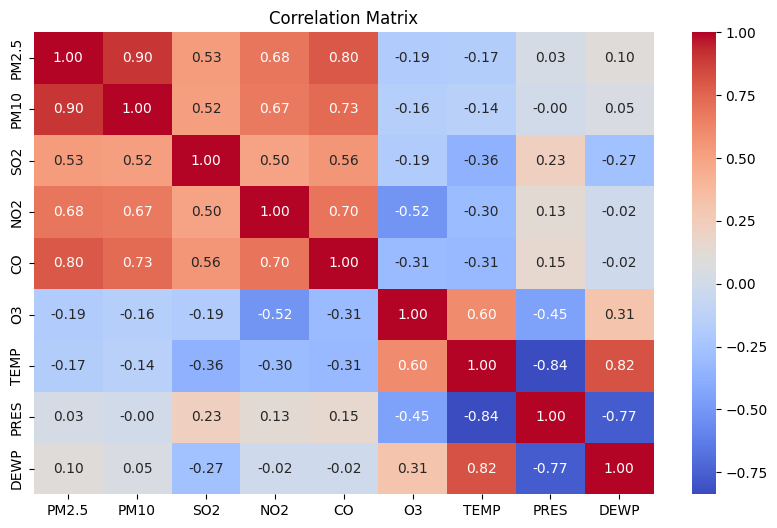

In [20]:
plt.figure(figsize=(10, 6))
correlation_matrix = scaled_cleaned_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

--------------------------------

## Model Creation :

In [21]:
# Apply K-means clustering with different numbers of clusters
cluster_range = range(2, 11)
silhouette_scores = []

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(scaled_cleaned_data)
    silhouette_avg = silhouette_score(scaled_cleaned_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

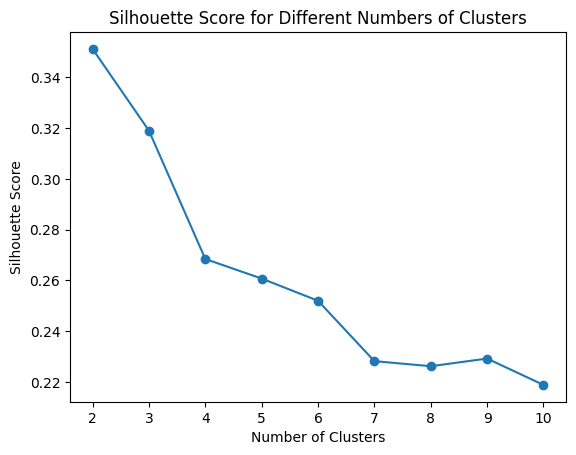

In [22]:
# Plotting the silhouette scores for different numbers of clusters
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.show()

In [23]:
kmeans = KMeans(n_clusters=4)

In [24]:
kmeans.fit(scaled_cleaned_data)

KMeans(n_clusters=4)

In [25]:
centers = kmeans.cluster_centers_

In [26]:
# get labels of clusters for each row in data
labels = kmeans.labels_
labels

array([2, 2, 2, ..., 2, 2, 2])

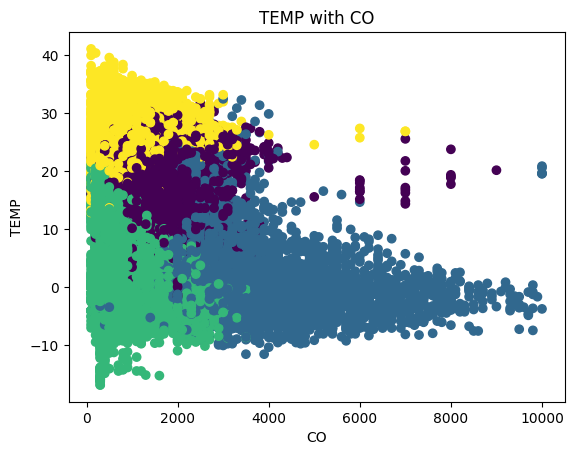

In [33]:
# display clusters
plt.scatter(cleaned_data1['CO'].values, cleaned_data1['TEMP'].values, c=labels, marker='o', cmap='viridis')
#plt.scatter(centers[:, 0], centers[:, 1], c='red', alpha=0.5)
#plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel('CO')
plt.ylabel('TEMP')
plt.title('TEMP with CO')
plt.show()

In [28]:
scaled_cleaned_data["target"] = labels

In [29]:
scaled_cleaned_data["target"].describe()

count    35064.000000
mean         1.581537
std          1.154777
min          0.000000
25%          0.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: target, dtype: float64

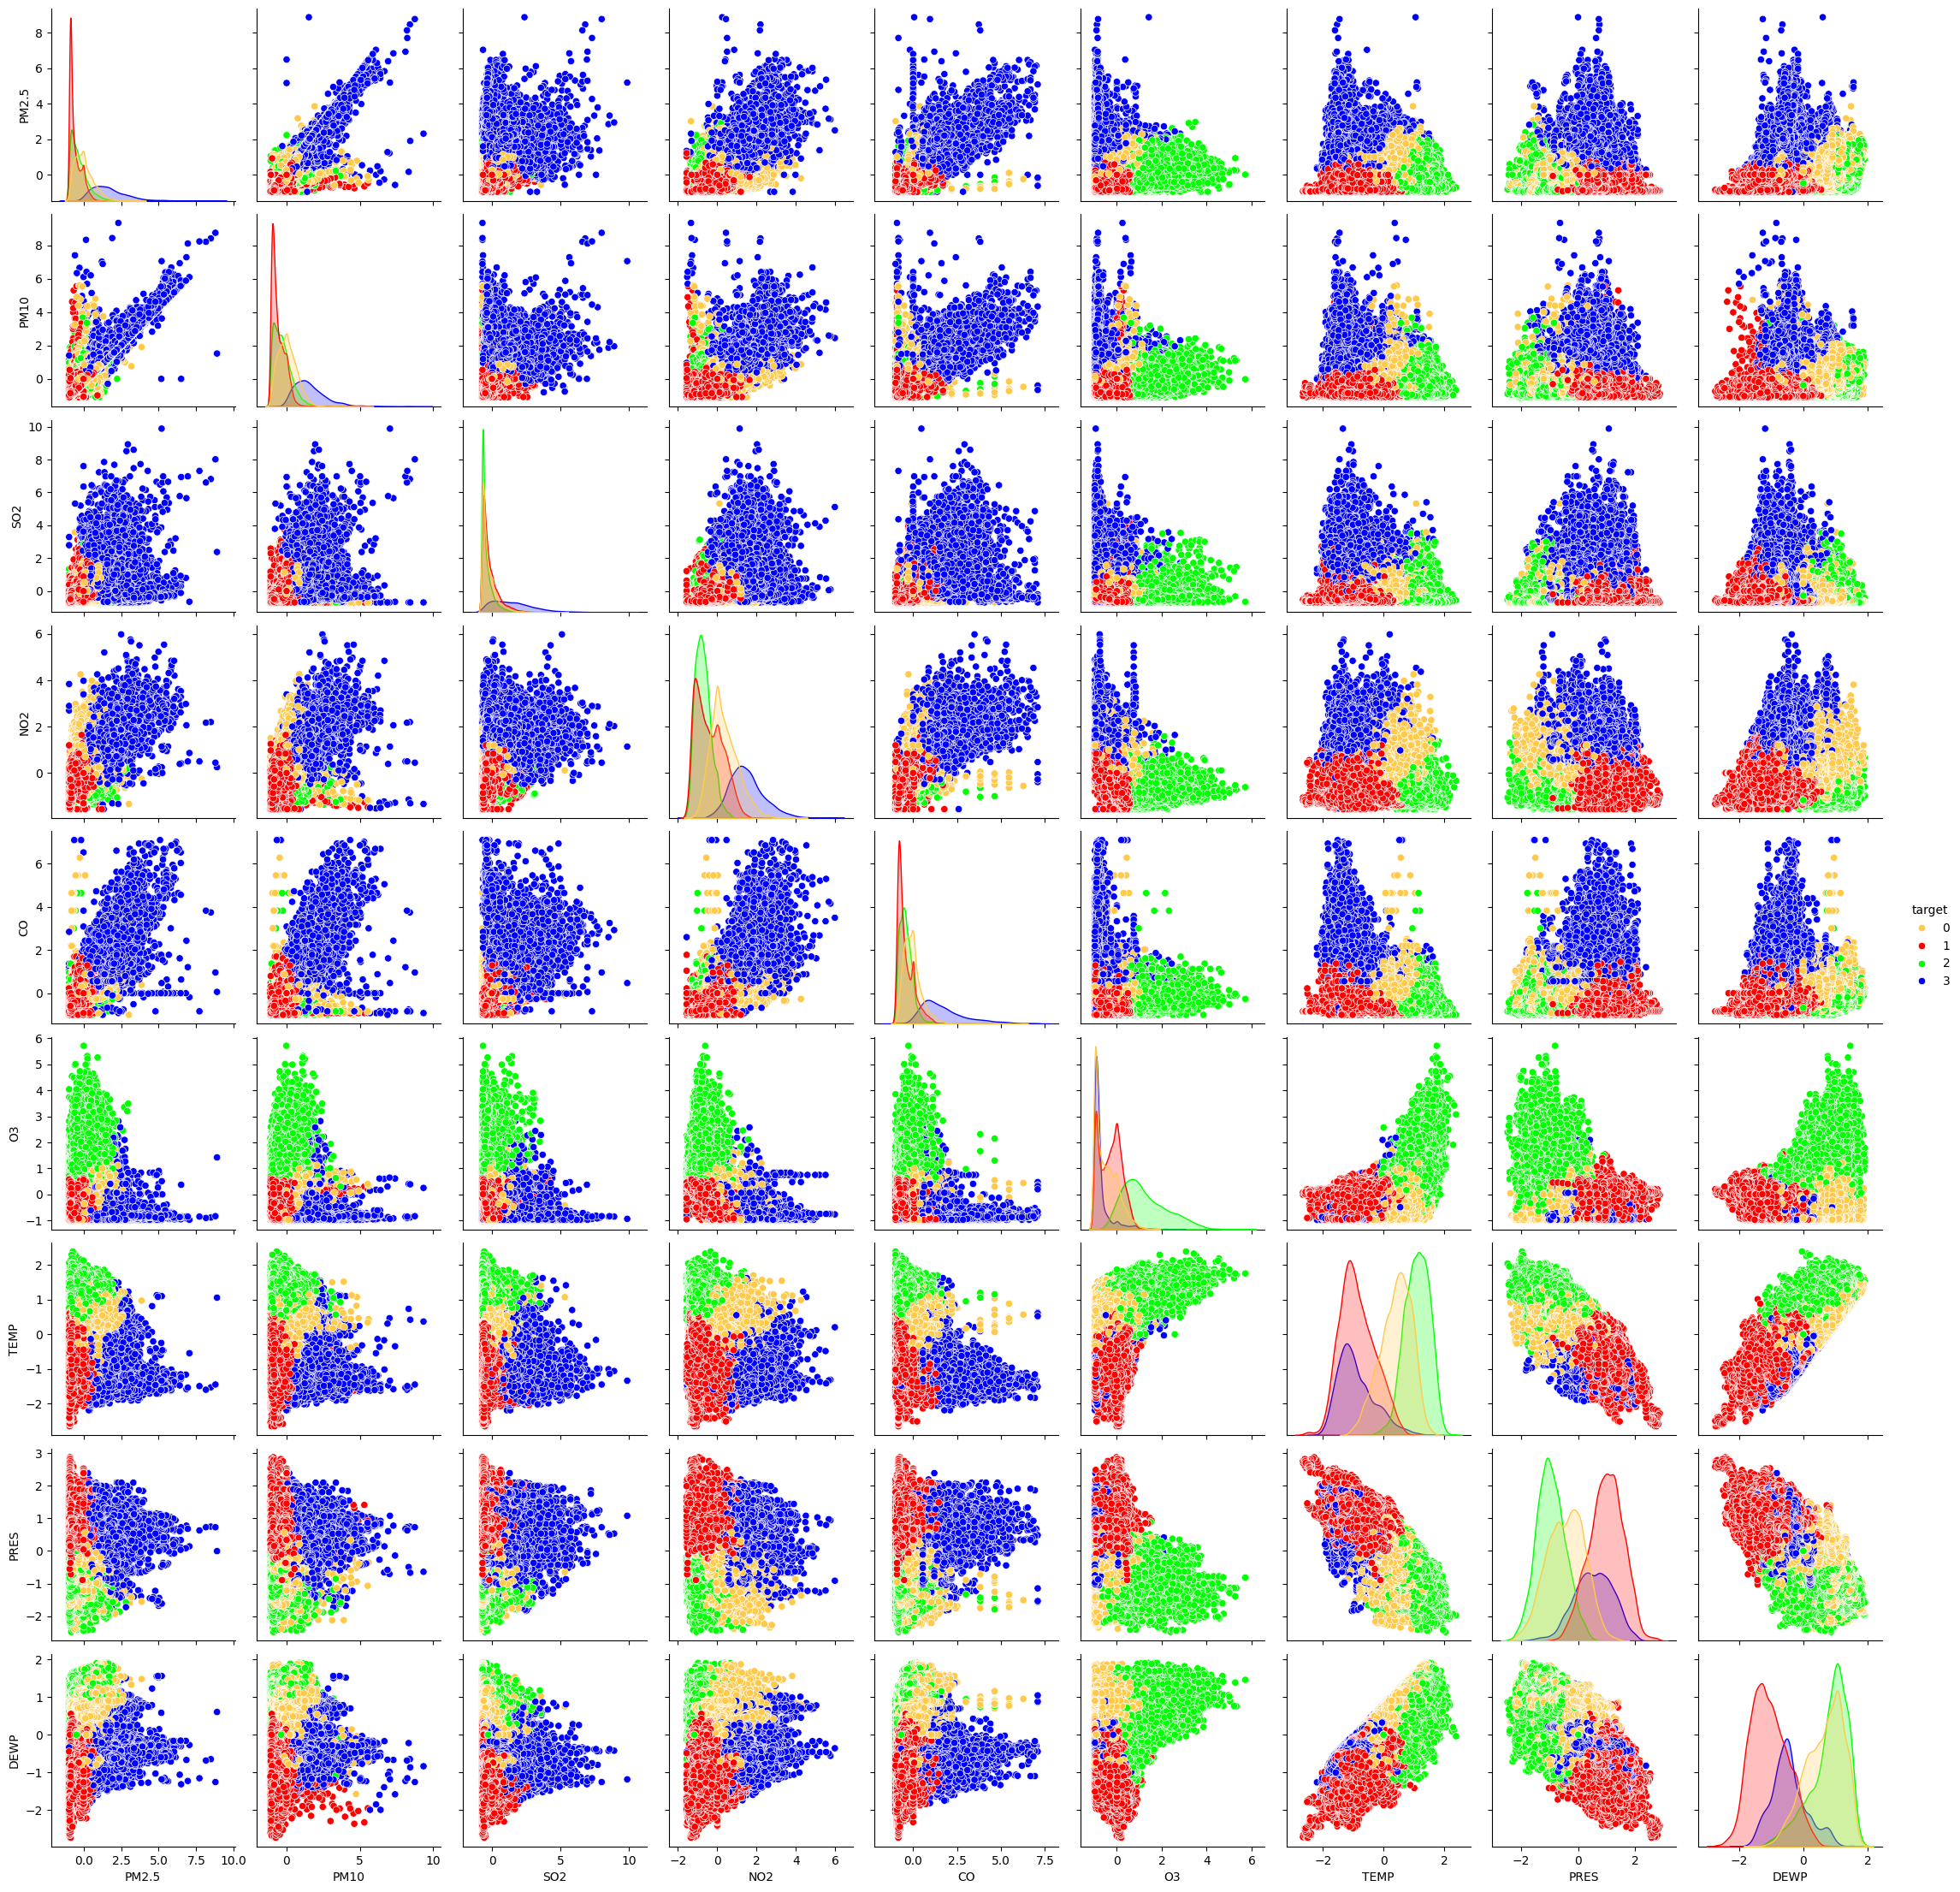

In [50]:
colors = ["#FFC94A", "#F00", "#0F0", "#00F"]

sns.pairplot(scaled_cleaned_data, hue="target", palette=colors)

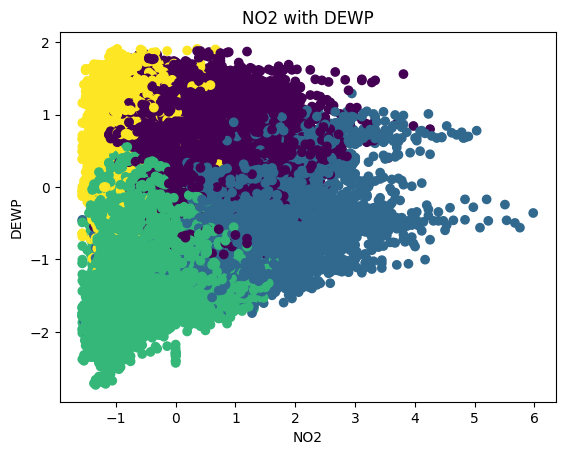

In [35]:
# display clusters
plt.scatter(scaled_cleaned_data['NO2'], scaled_cleaned_data['DEWP'], c=labels, cmap='viridis')
plt.xlabel('NO2')
plt.ylabel('DEWP')
plt.title('NO2 with DEWP')
plt.show()

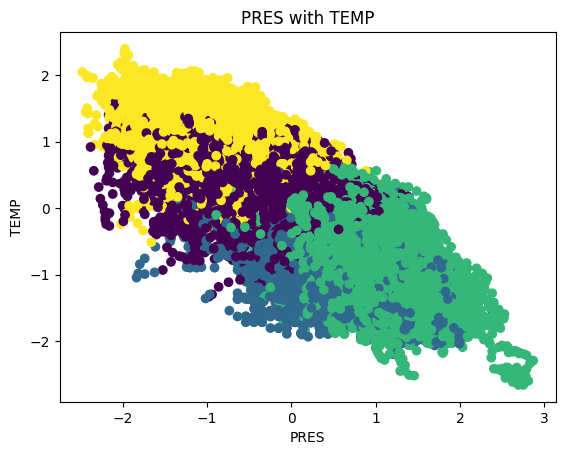

In [43]:
# display clusters
plt.scatter(scaled_cleaned_data['PRES'], scaled_cleaned_data['TEMP'], c=labels, cmap='viridis')
plt.xlabel('PRES')
plt.ylabel('TEMP')
plt.title('PRES with TEMP')
plt.show()